In [4]:
import pandas as pd

data1 = pd.read_csv('../Notebook\Country-data.csv', delimiter=',', header='infer')
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
data1['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Definisci variabili e target
data1["status"] = data1["gdpp"].apply(lambda x: 1 if x > 10000 else 0)

X = data1[["child_mort", "income", "life_expec", "health"]]
y = data1["status"]

# Allena
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

# Poi usa il pezzo sopra per visualizzare l’albero


DecisionTreeClassifier(max_depth=4, random_state=42)

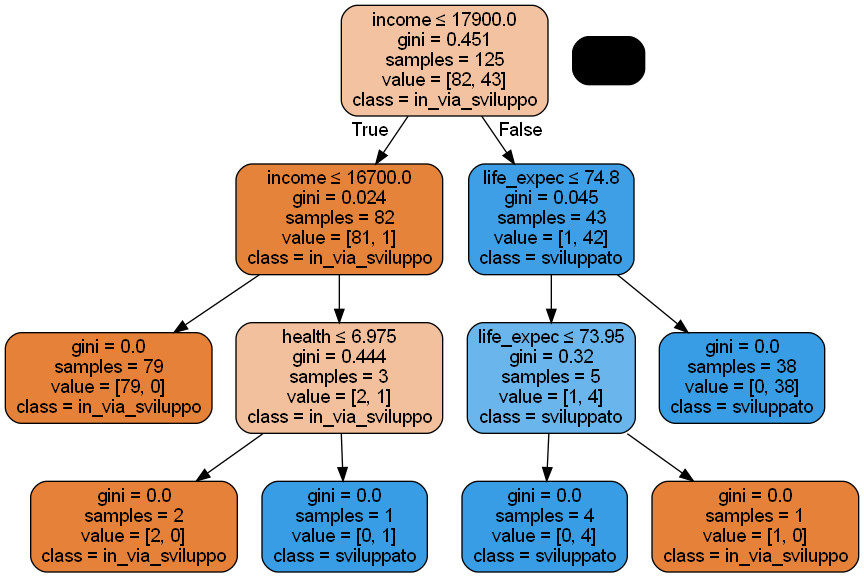

In [38]:
from sklearn import tree
import pydotplus
from IPython.display import Image

# Esporta l'albero decisionale
dot_data = tree.export_graphviz(
    clf,
    feature_names=X.columns,
    class_names=['in_via_sviluppo','sviluppato'],  # Etichette leggibili
    filled=True,
    rounded=True,
    special_characters=True,
    out_file=None
)

# Crea il grafico
graph = pydotplus.graph_from_dot_data(dot_data)

# Visualizza
Image(graph.create_png())


In [40]:
from sklearn import cluster

data = data1.drop('country',axis=1)
k_means = cluster.KMeans(n_clusters=5, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=data1.country, columns=['country'])

c:\Users\Utente\anaconda3\envs\DMtest\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,country
country,
Afghanistan,0
Albania,0
Algeria,4
Angola,0
Antigua and Barbuda,4
...,...
Vanuatu,0
Venezuela,4
Vietnam,0


In [16]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,62.565882,30.990576,6.128471,46.076069,4392.505882,9.778424,65.005882,3.871647,1998.164706
1,5.095000,57.045000,9.366000,48.210000,48140.000000,2.890600,80.395000,1.793500,46600.000000
2,12.883333,55.466667,7.445000,50.783333,32183.333333,5.183889,77.605556,2.051111,23916.666667
3,5.000000,92.333333,6.353333,64.766667,93000.000000,5.516667,80.600000,1.883333,87700.000000
4,17.663415,44.260976,6.753902,44.917073,16309.756098,7.334829,73.431707,2.067805,9013.902439


c:\Users\Utente\anaconda3\envs\DMtest\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Utente\anaconda3\envs\DMtest\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Utente\anaconda3\envs\DMtest\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Utente\anaconda3\envs\DMtest\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

Text(0, 0.5, 'SSE')

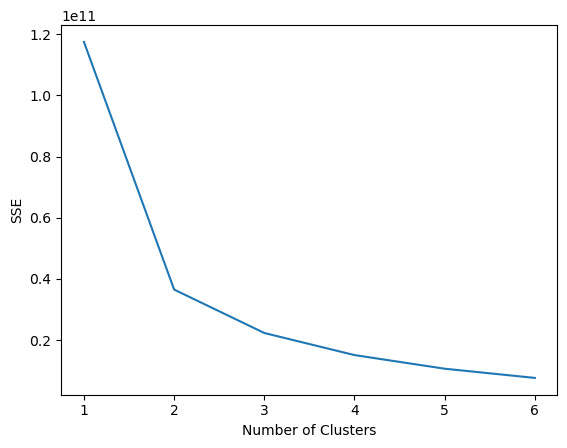

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

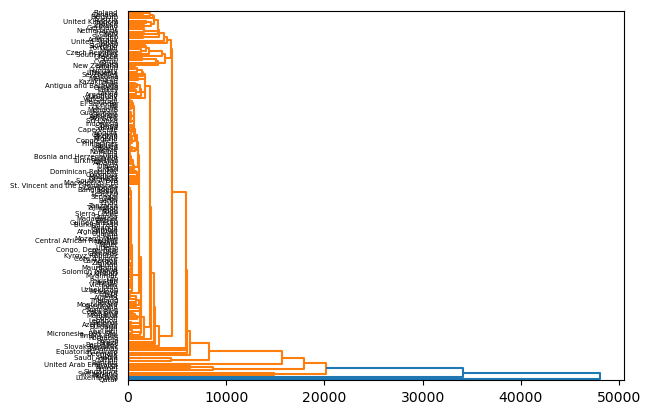

In [42]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data1['country']
Y = data1['country']
X = data1.drop(['country'],axis=1)
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

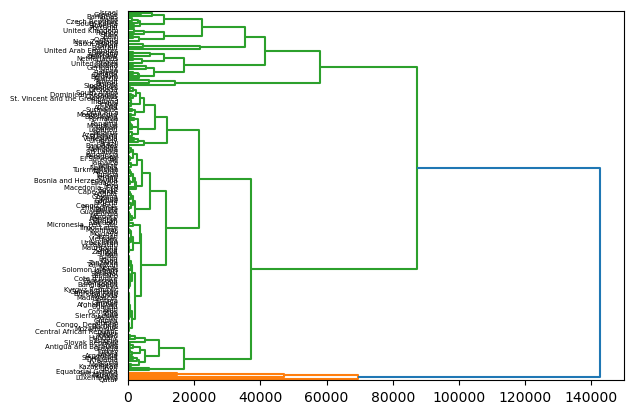

In [43]:
Z = hierarchy.linkage(X.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

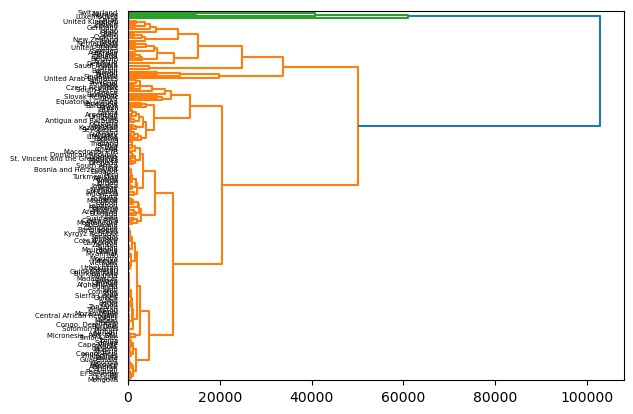

In [44]:
Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

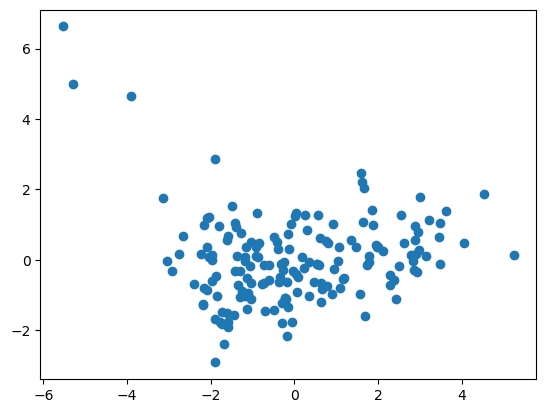

c:\Users\Utente\anaconda3\envs\DMtest\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


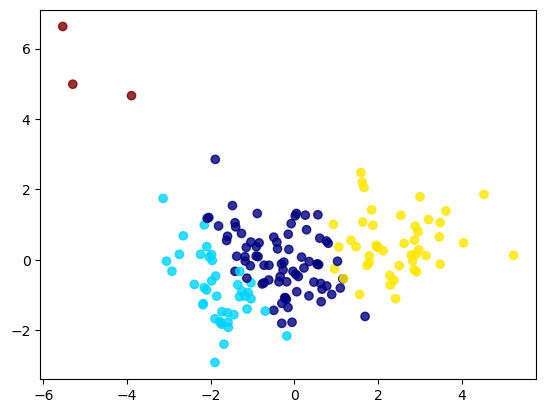

In [49]:
from sklearn import cluster
import pandas as pd

data_K= pd.read_csv('../Notebook\Country-data.csv', delimiter=',', header='infer')
genre_labels = data_K['gdpp']
data = data_K.drop(['gdpp','country'],axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaleddf = scaler.fit_transform(data)


from sklearn.decomposition import PCA

df_pca = PCA(n_components=2).fit_transform(scaleddf)
plt.scatter(df_pca[:,0], df_pca[:,1],alpha=1)
plt.show()



from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 4)
clf.fit(scaleddf)
labels = clf.labels_
## Plotting the clusters
import matplotlib.pyplot as plt
plt.scatter(df_pca[:,0], df_pca[:,1], alpha=0.8, c=labels, cmap='jet')
plt.show()

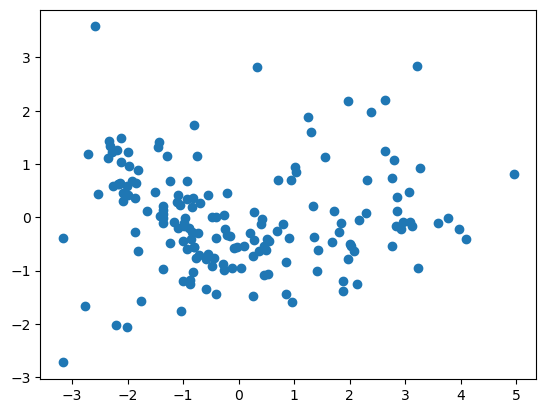

c:\Users\Utente\anaconda3\envs\DMtest\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


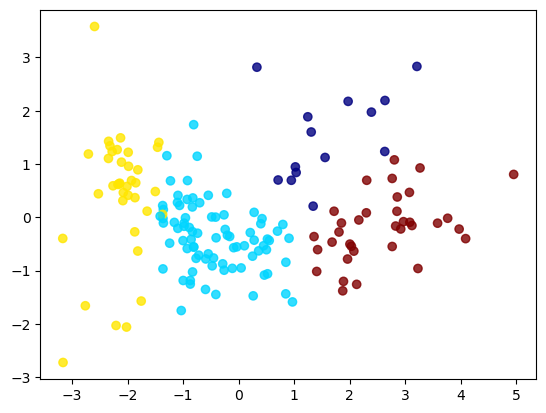

In [48]:
from sklearn import cluster
import pandas as pd

data_K= pd.read_csv('../Notebook\Country-data.csv', delimiter=',', header='infer')
genre_labels = data_K['gdpp']
data = data_K.drop(['exports','imports','gdpp','inflation','country'],axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaleddf = scaler.fit_transform(data)


from sklearn.decomposition import PCA

df_pca = PCA(n_components=2).fit_transform(scaleddf)
plt.scatter(df_pca[:,0], df_pca[:,1],alpha=1)
plt.show()



from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 4)
clf.fit(scaleddf)
labels = clf.labels_
## Plotting the clusters
import matplotlib.pyplot as plt
plt.scatter(df_pca[:,0], df_pca[:,1], alpha=0.8, c=labels, cmap='jet')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Crea la variabile target
data1["status"] = data1["gdpp"].apply(lambda x: 1 if x > 10000 else 0)

# Seleziona le feature
X = data1[["child_mort", "income", "life_expec", "health"]]
y = data1["status"]

# Split dati
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Allena il modello
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Valutazione
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.91      0.71      0.80        14

    accuracy                           0.88        42
   macro avg       0.89      0.84      0.86        42
weighted avg       0.88      0.88      0.88        42



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleziona le variabili
X = data1[["child_mort", "income", "health", "life_expec", "inflation"]]
y = data1["gdpp"]

# Split dati
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Allena il modello
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Valutazioni
y_pred = regressor.predict(X_test)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Errore RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Errore RMSE: 5327.97
R2 Score: 0.87


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Definisci la variabile target e le feature
data1["status"] = data1["gdpp"].apply(lambda x: 1 if x > 10000 else 0)

X = data1[["child_mort", "income", "life_expec", "health"]]
y = data1["status"]

# Split dati
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [13]:
# ==================================================
# 🌳 1. Random Forest
# ==================================================
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [14]:
# ==================================================
# 🖊️ 2. Support Vector Machines
# ==================================================
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [15]:
# ==================================================
# 🗺️ 3. Matrice di Confusione e Report
# ==================================================
def plot_confusion_matrix_and_report(y_test, y_pred, title="Matrice di Confusione e Report"):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predetti")
    plt.ylabel("Reali")
    plt.show()
    print("\n" + classification_report(y_test, y_pred))


🌳 Random Forest Results:


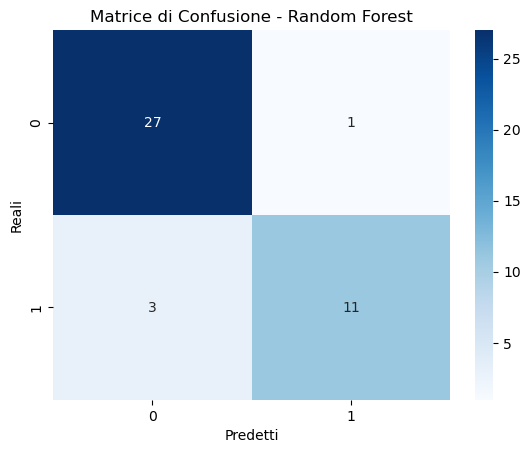


              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.92      0.79      0.85        14

    accuracy                           0.90        42
   macro avg       0.91      0.88      0.89        42
weighted avg       0.91      0.90      0.90        42


🖊️ Support Vector Machines Results:


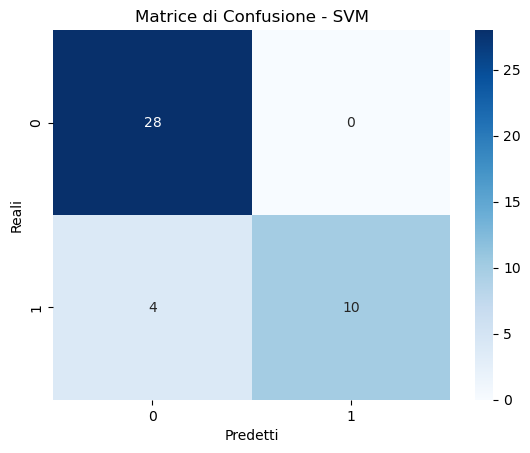


              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.71      0.83        14

    accuracy                           0.90        42
   macro avg       0.94      0.86      0.88        42
weighted avg       0.92      0.90      0.90        42



In [16]:
# Visualizza i risultati
print("\n🌳 Random Forest Results:")
plot_confusion_matrix_and_report(y_test, y_pred_rf, title="Matrice di Confusione - Random Forest")

print("\n🖊️ Support Vector Machines Results:")
plot_confusion_matrix_and_report(y_test, y_pred_svm, title="Matrice di Confusione - SVM")